## 06 Model Evaluation and Validation
**Objetivo**: Evaluar el modelo final en un conjunto de datos de validación.
**Contenido**:
- Evaluación del modelo con métricas avanzadas.
- Validación cruzada para asegurar la generalización del modelo.
- Análisis de errores y revisión de los resultados.


In [1]:
## Importar librerías
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


## Cargar los datos de test

In [2]:

dir_data_processed = '../data/processed'
ruta_archivo_X = os.path.join(dir_data_processed, 'X_test.csv')
X_test = pd.read_csv(ruta_archivo_X)

ruta_archivo_y = os.path.join(dir_data_processed, 'y_test.csv')
y_test = pd.read_csv(ruta_archivo_y)


## Evaluación del Modelo con Métricas Avanzadas

Precisión del modelo: 0.7343
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     63345
           1       0.07      0.77      0.12      1556

    accuracy                           0.73     64901
   macro avg       0.53      0.75      0.48     64901
weighted avg       0.97      0.73      0.83     64901

AUC-ROC: 0.8283


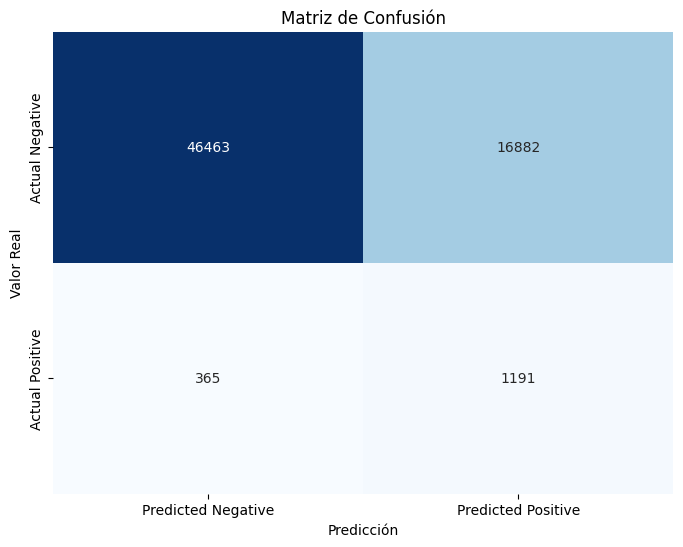

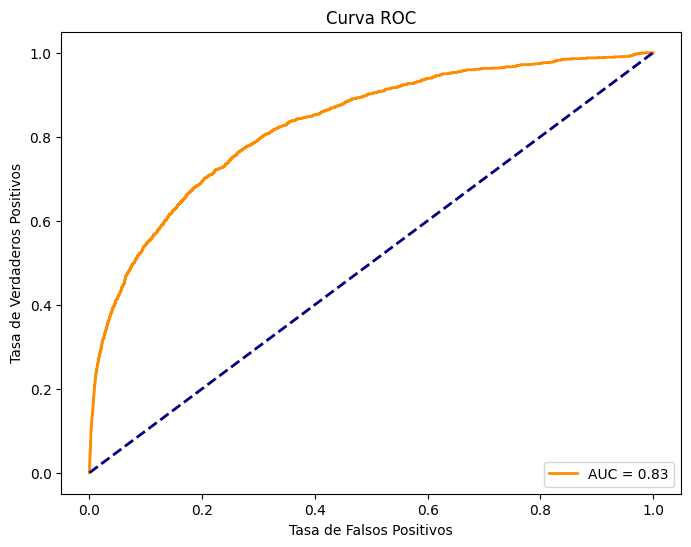

In [3]:
# Cargar el modelo guardado
dir_data_processed = '../models'
ruta_archivo_model = os.path.join(dir_data_processed, 'modelo_xgboost.bin')

loaded_model = xgb.XGBClassifier()
loaded_model.load_model(ruta_archivo_model)

# Predecir sobre datos de test
y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
y_pred = loaded_model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Imprimir métricas
print(f"Precisión del modelo: {accuracy:.4f}")
print("Reporte de Clasificación:")
print(classification_rep)
print(f"AUC-ROC: {auc_roc:.4f}")

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Resultados de la Detección de Fraude en Transacciones

- **Precisión del modelo:** 0.7374

#### Reporte de Clasificación:
| Clase | Precisión | Recall | Puntuación F1 | Soporte |
|-------|-----------|--------|---------------|---------|
| 0     | 0.99      | 0.74   | 0.85          | 63,345  |
| 1     | 0.06      | 0.74   | 0.12          | 1,556   |

- **AUC-ROC:** 0.8087

### Análisis:

El modelo presenta los siguientes resultados y se debe analizar su desempeño:

- **Precisión Global**: El modelo logra una precisión global del 73.74%, lo que significa que clasifica correctamente el 73.74% de todas las transacciones en el conjunto de datos de prueba.

- **Clase 0 (Transacciones no fraudulentas)**:
  - **Precisión**: Alta precisión del 99%, indicando que el 99% de las transacciones predichas como no fraudulentas son realmente no fraudulentas.
  - **Recall**: El 74% de las transacciones no fraudulentas fueron correctamente identificadas por el modelo.
  - **Puntuación F1**: Alta puntuación F1 de 0.85, que es una media armónica de precisión y recall. Esto sugiere un buen equilibrio entre precisión y recall para las transacciones no fraudulentas.

- **Clase 1 (Transacciones fraudulentas)**:
  - **Precisión**: Baja precisión del 6%, lo que indica que solo el 6% de las transacciones predichas como fraudulentas realmente son fraudulentas.
  - **Recall**: El 74% de todas las transacciones fraudulentas fueron correctamente identificadas por el modelo.
  - **Puntuación F1**: Baja puntuación F1 de 0.12, indicando que el modelo tiene dificultades para identificar correctamente las transacciones fraudulentas. Esto podría deberse a un alto número de falsos positivos.

- **AUC-ROC**: El área bajo la curva ROC es 0.8087, lo cual es relativamente bueno. Indica que el modelo tiene una buena capacidad para distinguir entre transacciones fraudulentas y no fraudulentas.

### Conclusión:

Aunque el modelo muestra una precisión global aceptable y un buen rendimiento en la clasificación de transacciones no fraudulentas, tiene deficiencias significativas en la detección precisa de transacciones fraudulentas. La baja precisión y puntuación F1 para la clase de transacciones fraudulentas sugieren que el modelo necesita mejoras, especialmente en la reducción de falsos positivos sin comprometer demasiado la precisión global.

Se recomienda ajustar el umbral de decisión del modelo, explorar técnicas de muestreo o considerar la incorporación de características adicionales para mejorar la detección de fraudes en transacciones.
